### Bread Basket Association Rules with Apriori Algortithm

Using the Apriori Algorithm, I will try to find some associations between products in orders of a bakery in Edinburgh, Scotland. The dataset has 20507 entries, over 9000 transactions, and 5 columns.

* Transaction - Id of the transaction
* Item - Product of that transaction
* date_time - Day and hour
* period_day - Period of the Day (morning, afteernoon, evening, night) 
* weekday_weekend - whether it was weekday or weekend

### Importing The Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing The Dataset

In [2]:
basket = pd.read_csv('bread basket.csv')

### Dataset Description

In [3]:
basket.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [4]:
basket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 480.7+ KB


### Visualizing Null Values

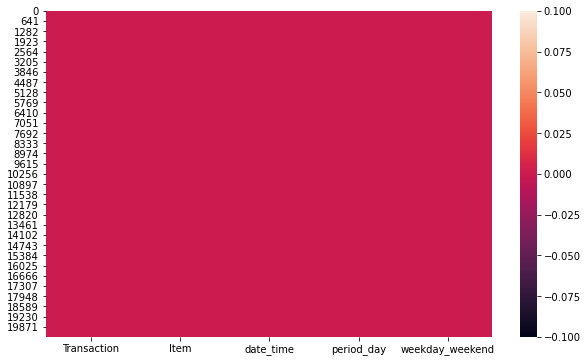

In [5]:
plt.subplots(figsize=(10,6))
sns.heatmap(basket.isnull())

Non null values in this dataset

## Data Cleaning

### Cleaning item column

In [6]:
basket['Item'] = basket['Item'].str.lower()
basket['Item'] = basket['Item'].str.strip()

### Spliting date time column

In [7]:
basket['Datetime'] = pd.to_datetime(basket['date_time'])

In [8]:
basket['date'] = basket['Datetime'].dt.date
basket['month'] = basket['Datetime'].dt.month
basket['day'] = basket['Datetime'].dt.weekday
basket['hour'] = basket['Datetime'].dt.hour

basket['day'] = basket['day'].replace((0,1,2,3,4,5,6), 
('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))

In [9]:
basket.drop(columns='date_time',inplace=True)

In [10]:
basket.head(3)

,Transaction,Item,period_day,weekday_weekend,Datetime,date,month,day,hour
0,1,bread,morning,weekend,2016-10-30 09:58:00,2016-10-30,10,Sunday,9
1,2,scandinavian,morning,weekend,2016-10-30 10:05:00,2016-10-30,10,Sunday,10
2,2,scandinavian,morning,weekend,2016-10-30 10:05:00,2016-10-30,10,Sunday,10


## Data Visualization

### Transactions per hour of the day

In [11]:
countByHour = basket.groupby('hour')['Transaction'].count().reset_index()
countByHour.sort_values('hour',inplace=True)

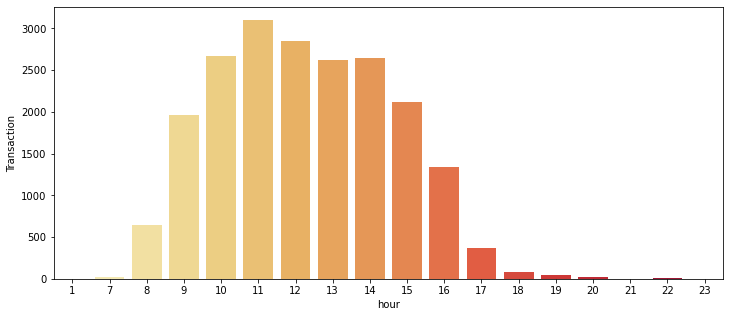

In [12]:
colors = sns.color_palette("YlOrRd", 18)
fig = plt.figure(figsize=(12,5))
sns.barplot(x=countByHour['hour'], y=countByHour['Transaction'], palette = colors)

### Transactions by Day Period

In [13]:
countByDayPeriod = basket.groupby('period_day')['Transaction'].count().reset_index()
countByDayPeriod.loc[:,"orderOfDayPeriod"] = [1,2,0,3]
countByDayPeriod.sort_values('orderOfDayPeriod',inplace=True)

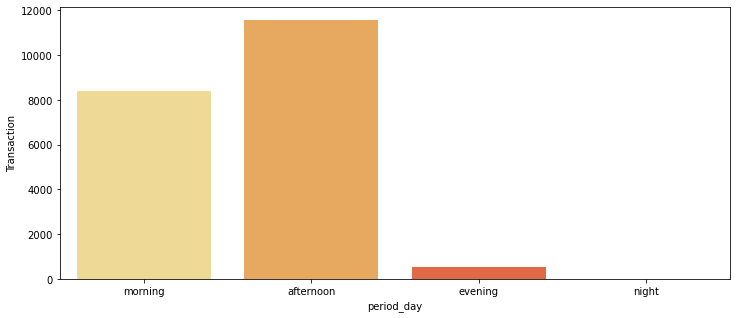

In [14]:
colors = sns.color_palette("YlOrRd", 4)
fig = plt.figure(figsize=(12,5))
sns.barplot(x=countByDayPeriod['period_day'], y=countByDayPeriod['Transaction'], palette = colors)

Most transactions in the morning and afternoon period

### Transactions per day of the week

In [15]:
countByDay = basket.groupby('day')['Transaction'].count().reset_index()
countByDay.loc[:,"orderOfDays"] = [4,0,5,6,3,1,2]
countByDay.sort_values("orderOfDays",inplace=True)

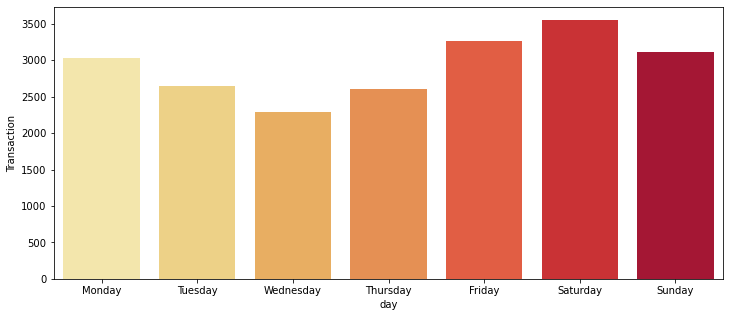

In [16]:
colors = sns.color_palette("YlOrRd", 7)
fig = plt.figure(figsize=(12,5))
sns.barplot(x=countByDay['day'], y=countByDay['Transaction'], palette = colors)

### Transactions by Week Period

In [17]:
countByWeekPeriod = basket.groupby('weekday_weekend')['Transaction'].count().reset_index()
countByWeekPeriod.sort_values('weekday_weekend',inplace=True)

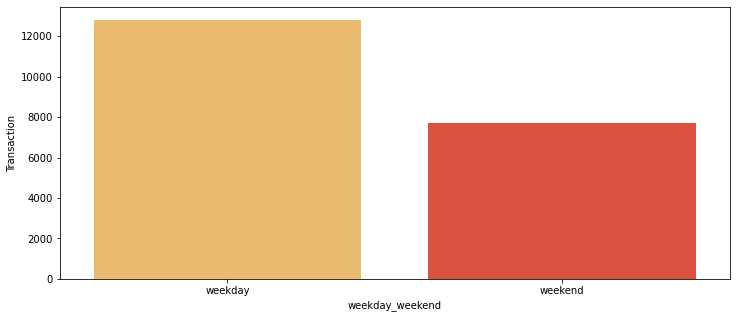

In [18]:
colors = sns.color_palette("YlOrRd", 2)
fig = plt.figure(figsize=(12,5))
sns.barplot(x=countByWeekPeriod['weekday_weekend'], y=countByWeekPeriod['Transaction'], palette = colors)

### Transactions By Month

In [19]:
countByMonth = basket.groupby('month')['Transaction'].count().reset_index()
countByMonth.sort_values('month',inplace=True)

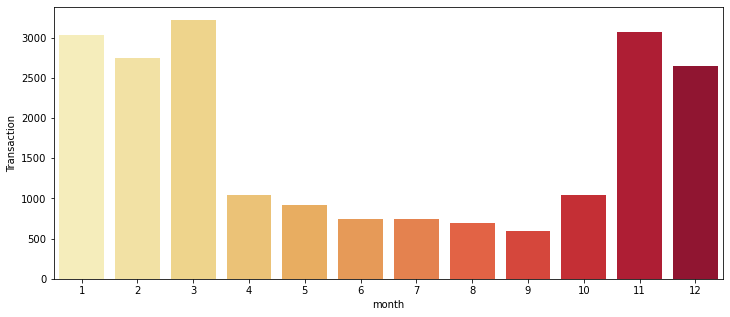

In [20]:
colors = sns.color_palette("YlOrRd", 12)
fig = plt.figure(figsize=(12,5))
sns.barplot(x=countByMonth['month'], y=countByMonth['Transaction'], palette = colors)

Most transactions in fall and winter

### Top 25 sold items

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

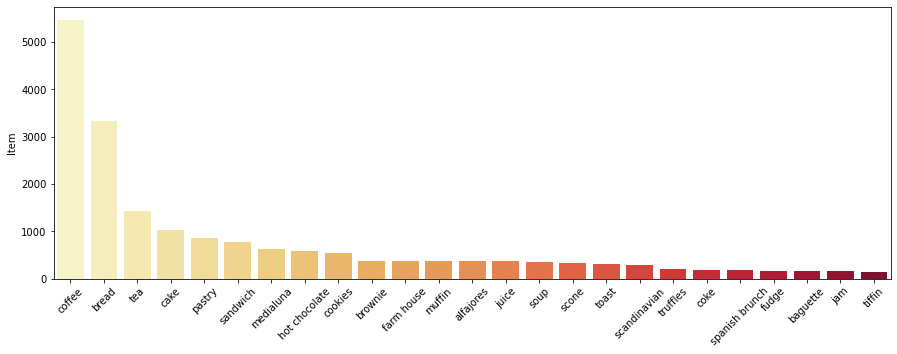

In [21]:
fig = plt.figure(figsize=(15,5))
colors = sns.color_palette("YlOrRd", 25)
names = basket.Item.value_counts().head(25).index
values = basket.Item.value_counts().head(25)
sns.barplot(x = names, y = values, palette = colors)
plt.xticks(rotation=45)

Coffee and bread are clearly the best selling products

### Top items sold by day period

In [22]:
items = basket.groupby(['Item','period_day'])['Transaction'].count().reset_index().sort_values(['period_day','Transaction'],ascending=False)

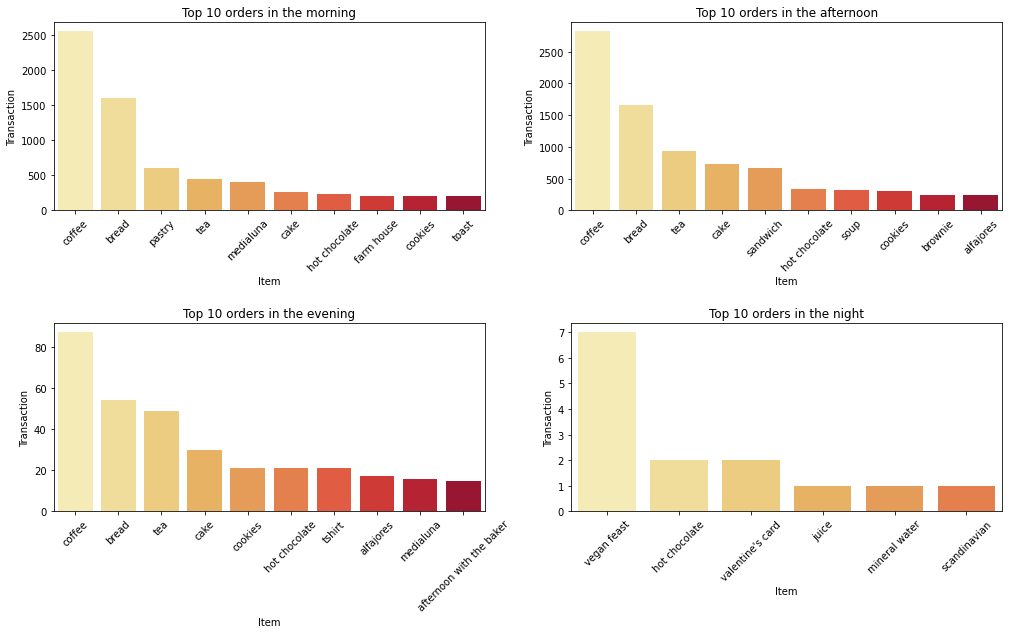

In [23]:
colors = sns.color_palette("YlOrRd", 10)
fig = plt.subplots(figsize=(17,9))
plt.subplots_adjust(hspace = 0.6)

plt.subplot(2,2,1)
plt.xticks(rotation=45)
plt.title('Top 10 orders in the morning')
dfMorning = items[items['period_day']=='morning'].head(10) 
sns.barplot(x = dfMorning.Item, y = dfMorning.Transaction, palette = colors)

plt.subplot(2,2,2)
plt.xticks(rotation=45)
plt.title('Top 10 orders in the afternoon')
dfAfternoon = items[items['period_day']=='afternoon'].head(10) 
sns.barplot(x = dfAfternoon.Item, y = dfAfternoon.Transaction, palette = colors)

plt.subplot(2,2,3)
plt.xticks(rotation=45)
plt.title('Top 10 orders in the evening')
dfEvening = items[items['period_day']=='evening'].head(10) 
sns.barplot(x = dfEvening.Item, y = dfEvening.Transaction, palette = colors)

plt.subplot(2,2,4)
plt.xticks(rotation=45)
plt.title('Top 10 orders in the night')
dfNight = items[items['period_day']=='night'].head(10) 
sns.barplot(x = dfNight.Item, y = dfNight.Transaction, palette = colors)

### Top items sold by Weekend or WeekDay

In [24]:
items2 = basket.groupby(['Item','weekday_weekend'])['Transaction'].count().reset_index().sort_values(['weekday_weekend','Transaction'],ascending=False)

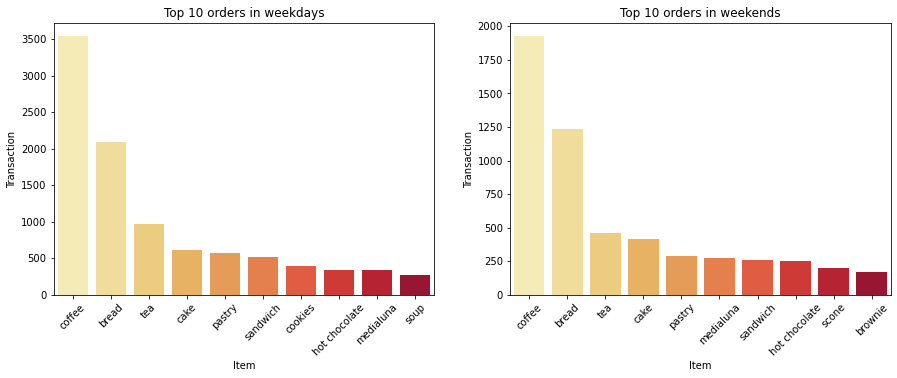

In [25]:
colors = sns.color_palette("YlOrRd", 10)
fig = plt.subplots(figsize=(15,5))

plt.subplot(1,2,1)
plt.xticks(rotation=45)
plt.title('Top 10 orders in weekdays')
dfWeekday = items2[items2['weekday_weekend']=='weekday'].head(10) 
sns.barplot(x = dfWeekday.Item, y = dfWeekday.Transaction, palette = colors)

plt.subplot(1,2,2)
plt.xticks(rotation=45)
plt.title('Top 10 orders in weekends')
dfWeekend = items2[items2['weekday_weekend']=='weekend'].head(10) 
sns.barplot(x = dfWeekend.Item, y = dfWeekend.Transaction, palette = colors)

## Apriori Algorithm

### Data Processing

In [26]:
transactions = basket.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name='Number of Items')
table = transactions.pivot_table(index='Transaction', columns='Item', values='Number of Items', aggfunc='sum').fillna(0)

In [27]:
table.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
def hot_encode(x): 
    if(x==0): 
        return False
    if(x>0): 
        return True

In [29]:
final_table = table.applymap(hot_encode) 

In [30]:
final_table.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Calculating Support

In [45]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [46]:
frequence = apriori(final_table, min_support=0.015, use_colnames=True)
frequence.sort_values(by=['support'], ascending = False)

,support,itemsets
5,0.478394,(coffee)
2,0.327205,(bread)
21,0.142631,(tea)
4,0.103856,(cake)
27,0.090016,"(bread, coffee)"
15,0.086107,(pastry)
16,0.071844,(sandwich)
13,0.061807,(medialuna)
10,0.058320,(hot chocolate)
33,0.054728,"(cake, coffee)"


### Calculating Confidence

In [47]:
rules = association_rules(frequence, metric = 'confidence', min_threshold = 0.3)
rules.sort_values('confidence', ascending = False, inplace=True)

In [48]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
14,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
7,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
9,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
0,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
6,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
10,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
3,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
11,(scone),(coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
4,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174
5,(hot chocolate),(coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553


### Filtering Lift >= 1

In [49]:
rules = rules[rules['lift']>=1]

In [51]:
rules[['antecedents','consequents','support','confidence','lift']]

,antecedents,consequents,support,confidence,lift
14,(toast),(coffee),0.023666,0.704403,1.472431
7,(medialuna),(coffee),0.035182,0.569231,1.189878
9,(pastry),(coffee),0.047544,0.552147,1.154168
0,(alfajores),(coffee),0.019651,0.540698,1.130235
6,(juice),(coffee),0.020602,0.534247,1.116750
10,(sandwich),(coffee),0.038246,0.532353,1.112792
3,(cake),(coffee),0.054728,0.526958,1.101515
11,(scone),(coffee),0.018067,0.522936,1.093107
4,(cookies),(coffee),0.028209,0.518447,1.083723
5,(hot chocolate),(coffee),0.029583,0.507246,1.060311


#### We can clearly see that coffee is an item that is very associated with other purchases in the bakery, such as toast, medialuna and pastry